# Investigating Stability

1. Determine whether or not the system provided is intrinsically stable (HINT: Check the eigenvalues of A - they should all have magnitude less than one for strict stability)

2. Run the controller below for different values of N and R to determine whether or not the state trajectories converge to the origin.  Create a loop, where you test values of R between 0 and 10, and values of N between 1 and 20 and look at the final trajectory point to determine convergence/divergence.  Plot a grid of the stable configurations, and comment on the resulting plot.  Is the stable region convex?

3. Assume a terminal controller of the form u = [-1 -0.5] x. Solve the Lyapunov equation  A^T P A - P = -Q - K^T R K.  Use the numpy scipy.linalg.solve_discrete_lyapunov to find a value of P that guarantees stability, for R = 1.

In [10]:
# MPC Controller Example

import numpy as np
import cvxpy as cvx

# System model - double integrator
A = np.matrix('1.216, -0.055; 0.221, 0.9947')
B = np.matrix('0.02763;0.002763')

# Prediction Horizon
N = 50

# Inputs and states
nx = 2; nu = 1;

X = cvx.Variable(nx,N+1)
U = cvx.Variable(nu,N)

# Constraints
maxU = 100

# Cost function matrices
P = np.identity(2); Q = np.identity(2); R = 0.5

# Initial state as a parameter
x_param = cvx.Parameter(nx,1)

# Objective function and constraints
obj = cvx.Minimize(sum([cvx.quad_form(X[:,i],Q) for i in range(0,N)])
                   + sum([cvx.quad_form(U[:,i],R) for i in range(0,N)])
                   + cvx.quad_form(X[:,N],P))

con = [X[:,0] == x_param] # Parameterized initial state
con += [X[:,1:N+1] == A*X[:,0:N] + B*U[:,0:N]]
con += [-maxU <= U, U <= maxU]

problem = cvx.Problem(obj,con)

# Controller
def controller(x):
    x_param.value = x
    problem.solve()
    return U[:,0].value

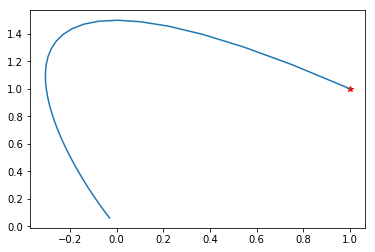

In [11]:
import matplotlib.pyplot as plt

# Simulation Parameters
steps = 50
states = np.matrix(np.zeros([nx,steps+1]))
inputs = np.matrix(np.zeros([nu,steps]))

# Numerical value for initial state
x0= np.matrix('1;1')
states[:,0] = x0

for k in range(0,steps):
    inputs[:,k] = controller(states[:,k])
    states[:,k+1] = A*states[:,k] + B*inputs[:,k]

plt.figure()
plt.plot(x0[0],x0[1],'r*')
plt.plot(states[0,:].T,states[1,:].T)
plt.show()